<a href="https://colab.research.google.com/github/EvADarya/Data_processing-DLS-/blob/main/ML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [6]:
df = pd.read_csv('/star_classification.csv')

In [7]:
label_ecncoder = LabelEncoder()
df['class'] = label_ecncoder.fit_transform(df['class'])

In [8]:
df['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

<Axes: >

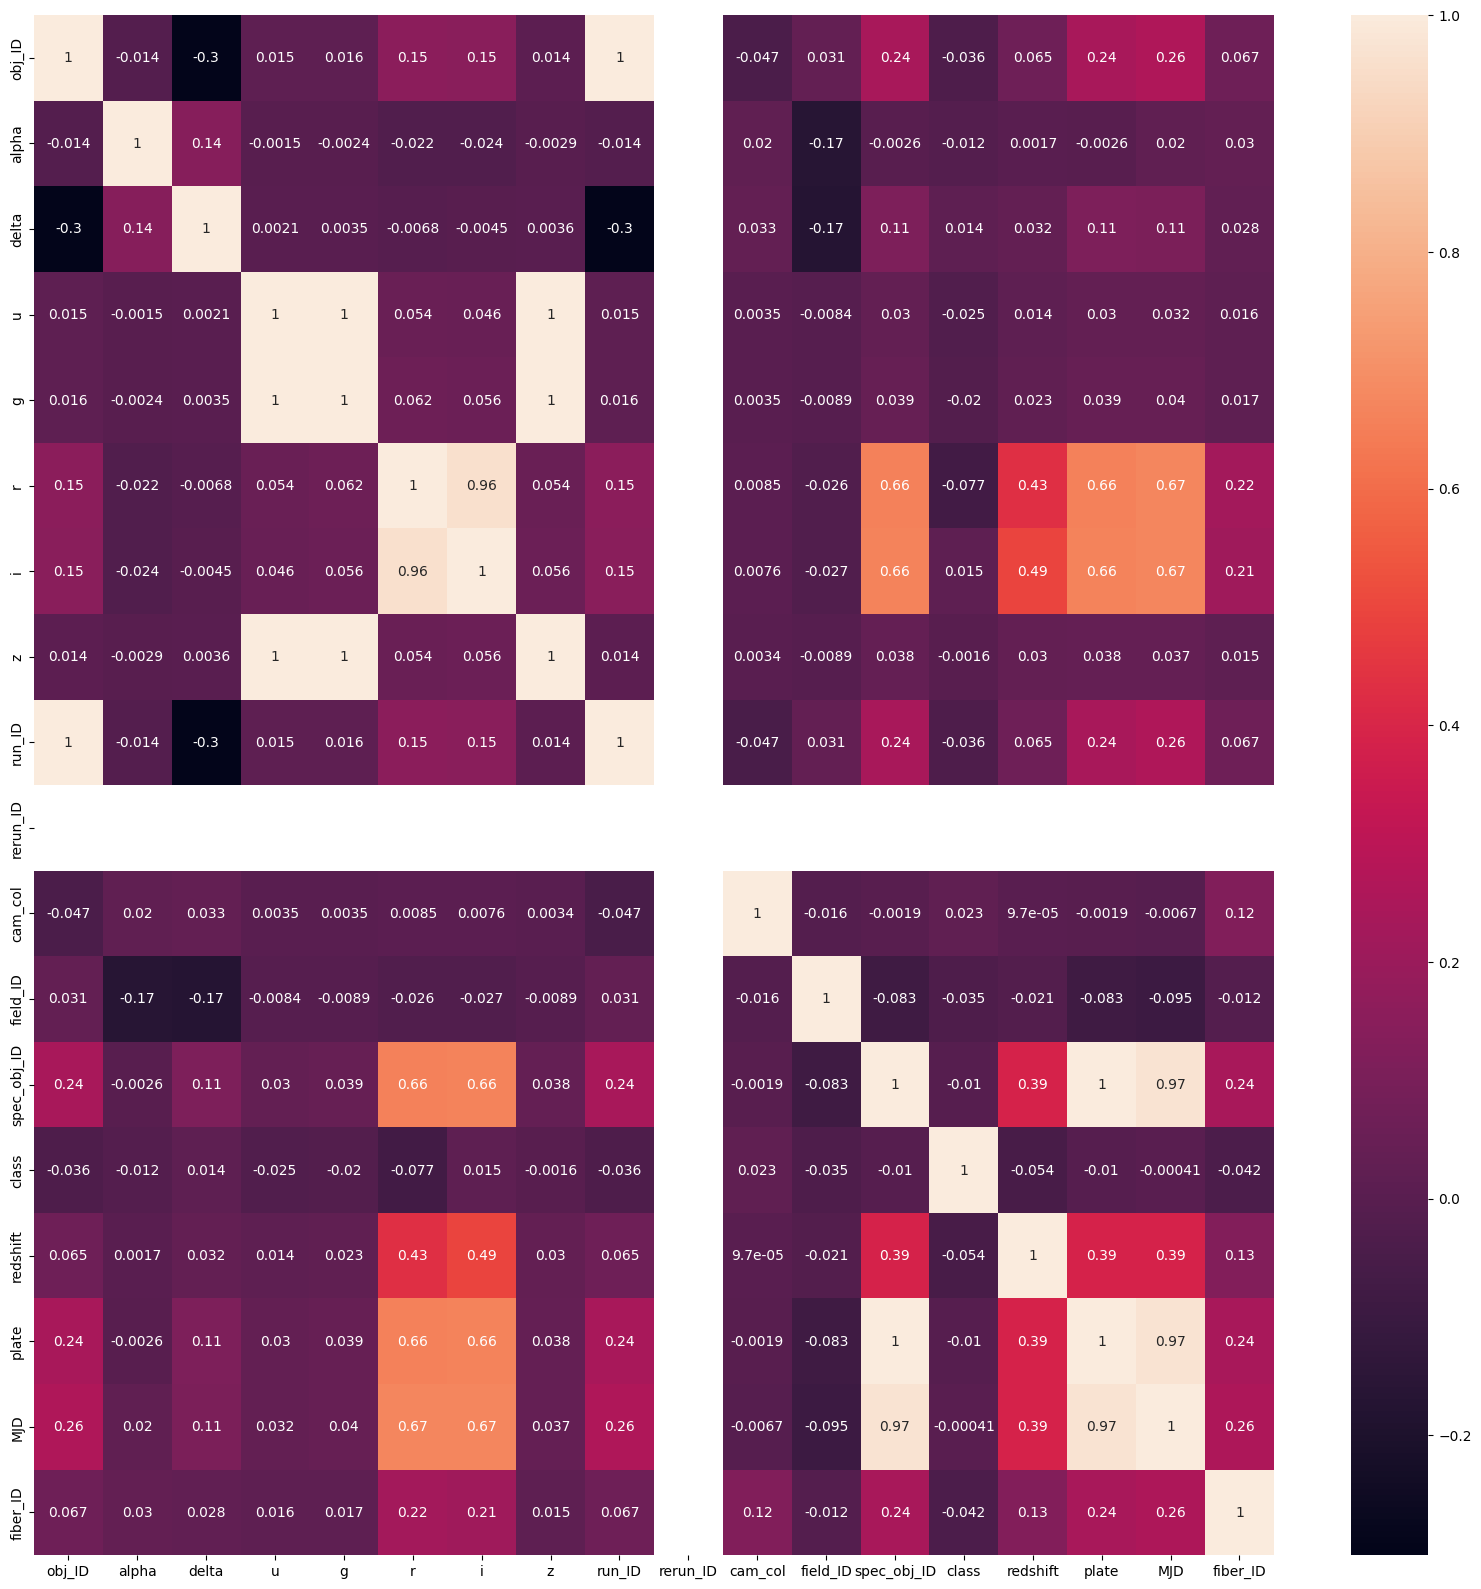

In [9]:
corrmatrix = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corrmatrix, annot= True)


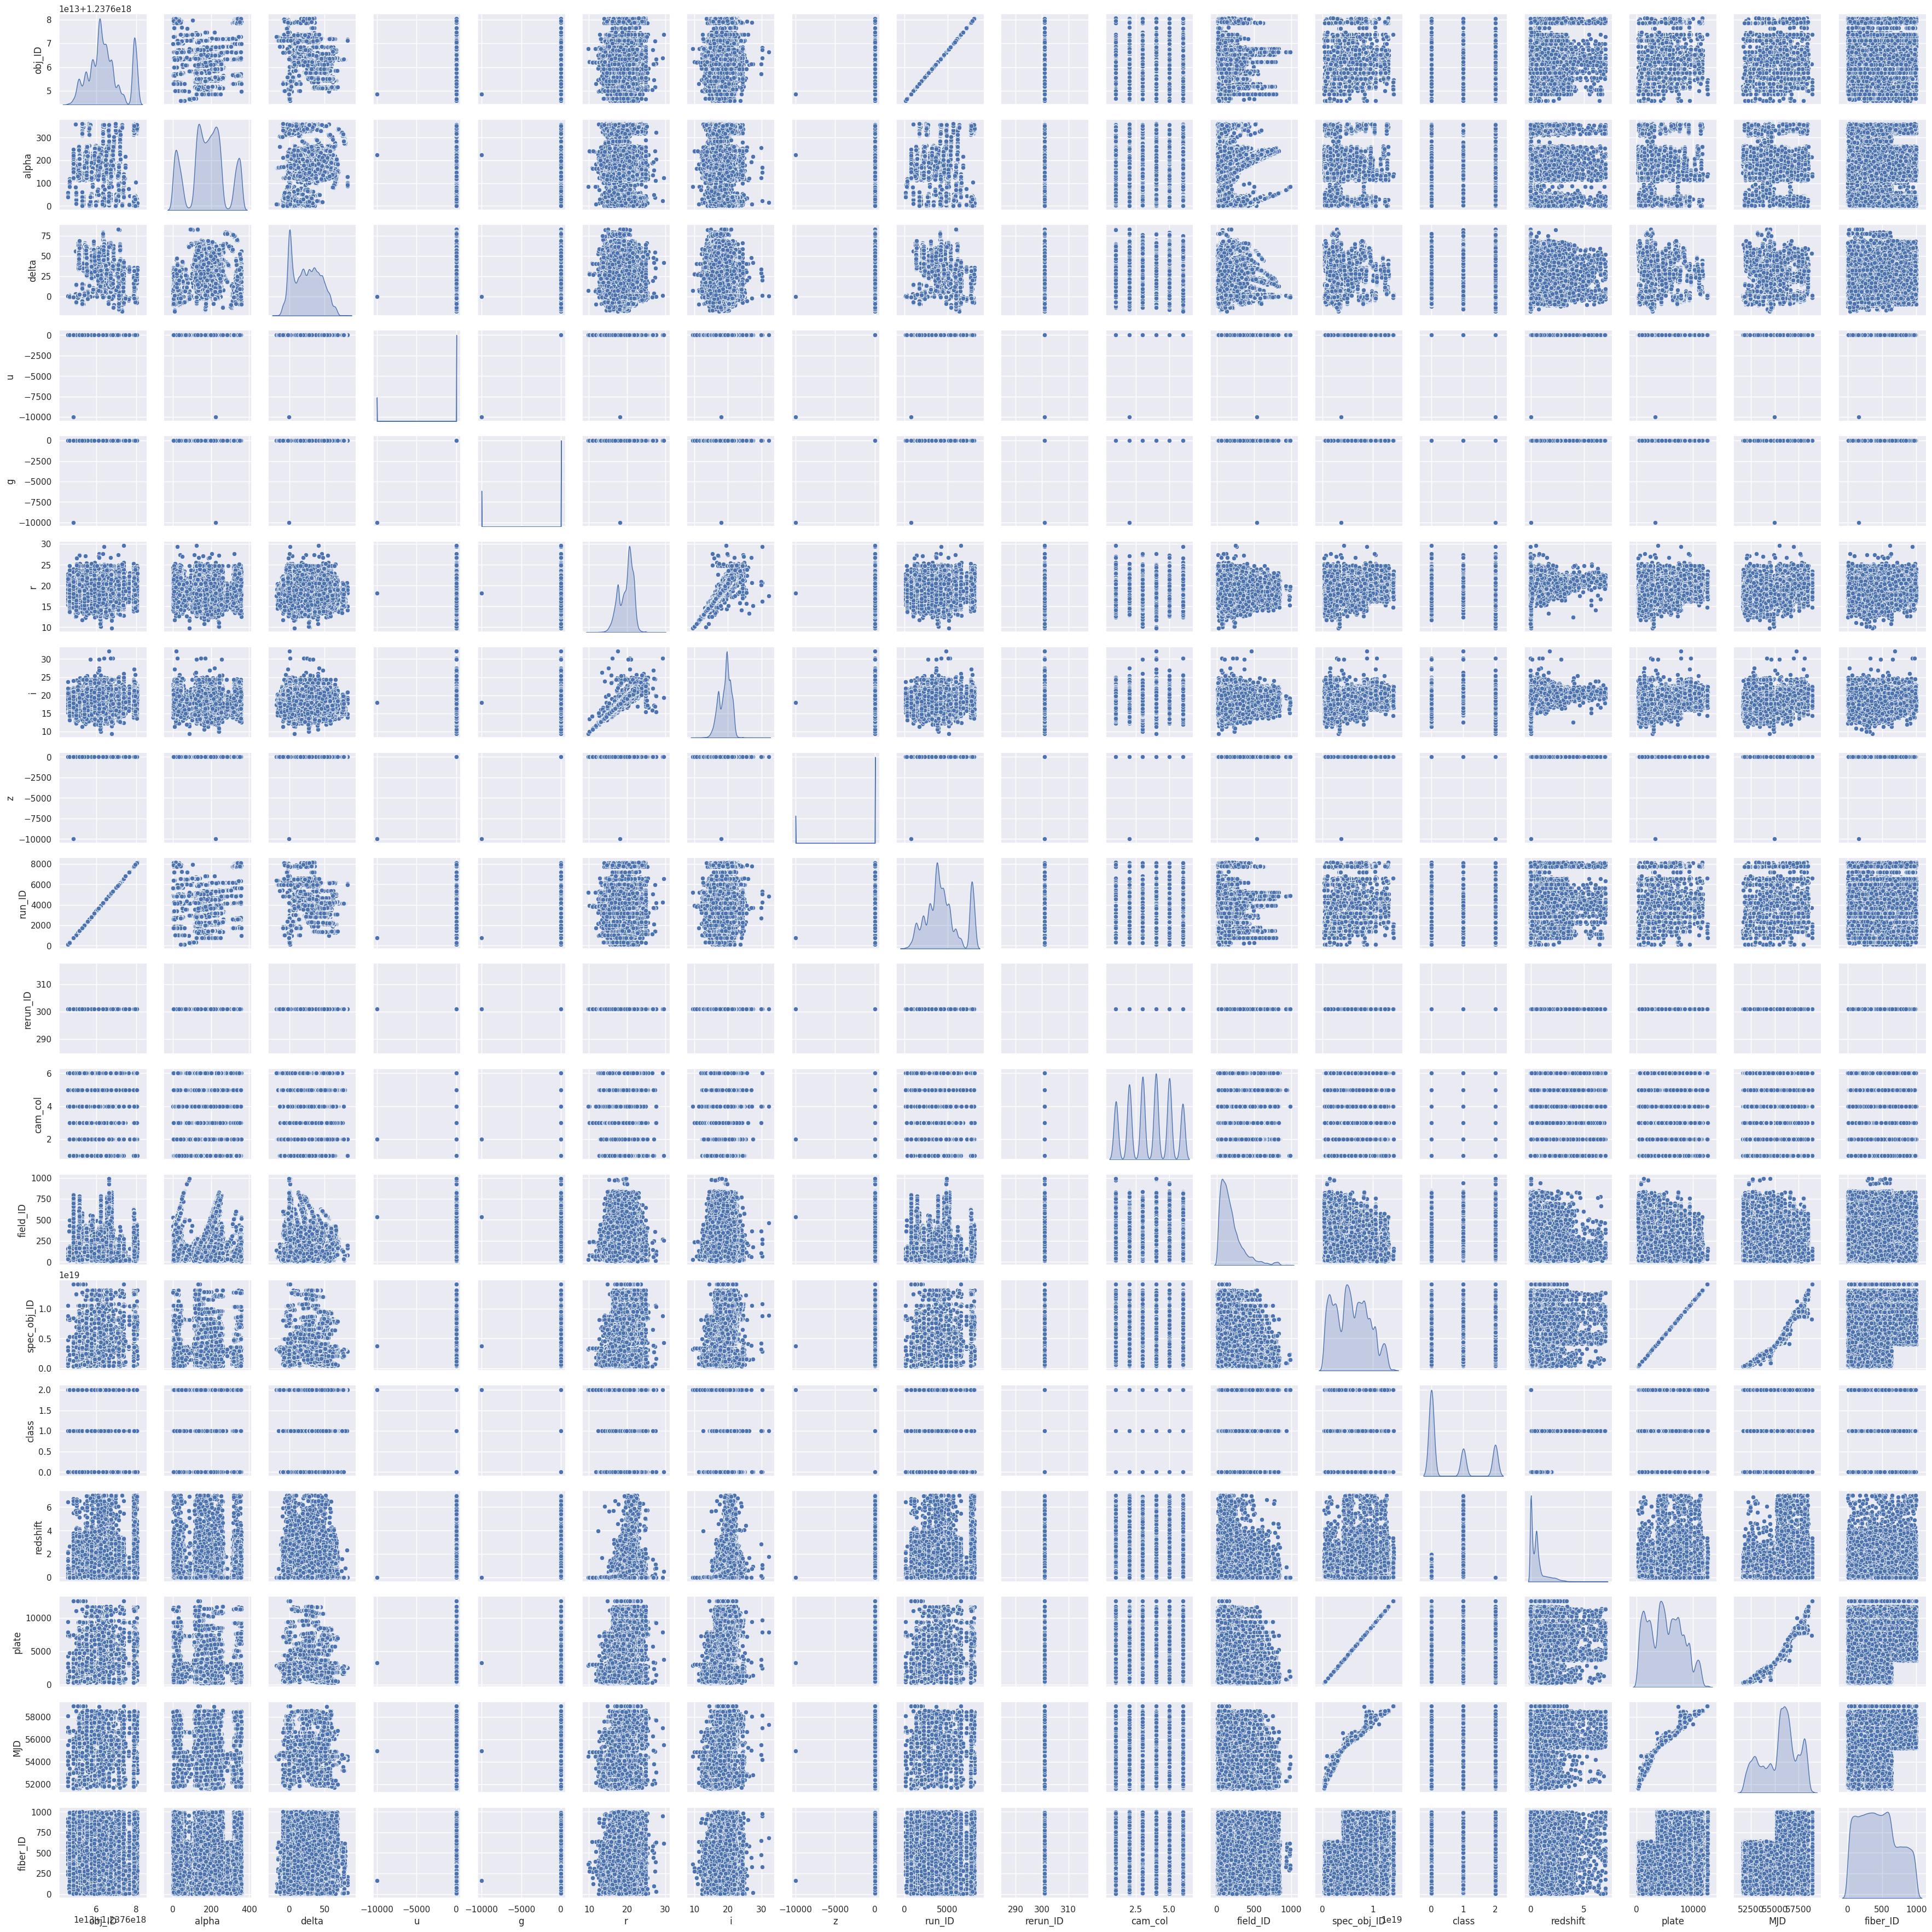

In [10]:
sns.set()
sns.pairplot(df, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

In [11]:
lof = LocalOutlierFactor()
outliners_index = lof.fit_predict(df)
outliners = df[outliners_index == -1]

In [12]:
df.drop(outliners.index, axis = 0, inplace=True)

In [13]:
df.drop(['z','MJD'], axis = 1,inplace = True)

In [14]:
x = df.drop('class', axis = 1).values
y = df['class'].values

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle= True)

In [21]:
model_1 = KNeighborsClassifier()
model_2 = DecisionTreeClassifier(random_state=44)
model_2.fit(x_train, y_train)

print(f'MSE train = {mean_squared_error(y_train, model_2.predict(x_train))}')
print(f'MSE test = {mean_squared_error(y_test, model_2.predict(x_test))}')


MSE train = 0.0
MSE test = 0.04076936692430232


In [17]:
print(f"Accuracy train = {accuracy_score(y_train, model_2.predict(x_train))}")
print(f"Accuracy test = {accuracy_score(y_test, model_2.predict(x_test))}")

Accuracy train = 1.0
Accuracy test = 0.9638326744940704


In [36]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model_2)
plt.savefig('decision_tree.pdf', bbox_inches='tight')
plt.close()

In [22]:
model_1.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
print(f'MSE train = {mean_squared_error(y_train, model_1.predict(x_train))}')
print(f'MSE test = {mean_squared_error(y_test, model_1.predict(x_test))}')
print(f"Accuracy train = {accuracy_score(y_train, model_1.predict(x_train))}")
print(f"Accuracy test = {accuracy_score(y_test, model_1.predict(x_test))}")

MSE train = 0.4741942621137252
MSE test = 0.6071744645701811
Accuracy train = 0.7761339331809131
Accuracy test = 0.7064723582512242


In [27]:
param_grid = {
    'n_neighbors': [2,3,4,5,6]
}

gridsearch = GridSearchCV(model_1, param_grid, refit=True, scoring='accuracy')

# запустим поиск
gridsearch.fit(x_train, y_train)

# выведем наилучшие параметры
print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

{'n_neighbors': 6}


In [30]:
print("best_score_accuracy:", gridsearch.best_score_)

best_score_accuracy: 0.7091230916734272
